In [52]:
import numpy as np
import pandas as pd

from imp import reload
import stochasticgrowth_eventline as sge
sge = reload(sge)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (8,6)

import glob,os

In [18]:
def LMSQ(x,y):
    n   = len(x)
    sx  = np.sum(x)
    sy  = np.sum(y)
    sxx = np.dot(x,x)
    sxy = np.dot(x,y)
    syy = np.dot(y,y)
    
    denom  = (n*sxx-sx*sx)
    b      = (n*sxy - sx*sy)/denom
    a      = (sy-b*sx)/n
    estim  = np.array([a,b],dtype=np.float)

    sigma2 = syy + n*a*a + b*b*sxx + 2*a*b*sx - 2*a*sy - 2*b*sxy
    cov    = sigma2 / denom * np.array([[sxx,-sx],[-sx,n]],dtype=np.float)

    return estim,cov

In [22]:
datadir = '/home/lukas/projects/growthratedifferences/simulations/190920_sample/newsim/'
datafiles = glob.glob(datadir + 'out.n????.r???')


<IPython.core.display.Javascript object>


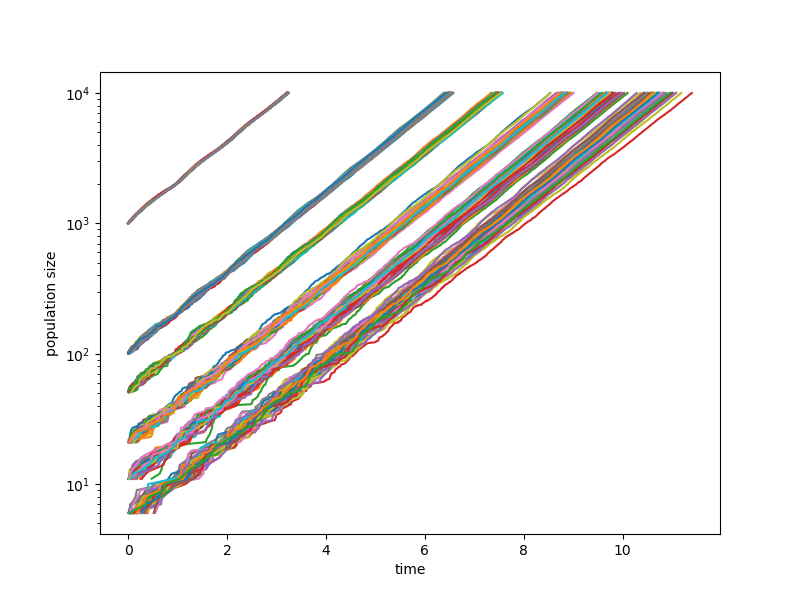

In [32]:
for filename in datafiles:
    d = pd.read_csv(filename,sep = ' ')
    plt.plot(d['time'],d['#populationsize'])

plt.yscale('log')
plt.ylabel('population size')
plt.xlabel('time')
plt.show()

In [25]:
def initialsizeFN(filename):
    return int(filename.split('.')[1][1:])

growthrates = dict()

for filename in datafiles:
    d = pd.read_csv(filename,sep = ' ')
    initialsize = initialsizeFN(filename)
    if not initialsize in growthrates.keys():
        growthrates[initialsize] = list()
    
    gr_fit,gr_cov = LMSQ(d['time'],np.log(d['#populationsize']))
    
    growthrates[initialsize].append(gr_fit[1])
    
    

<IPython.core.display.Javascript object>


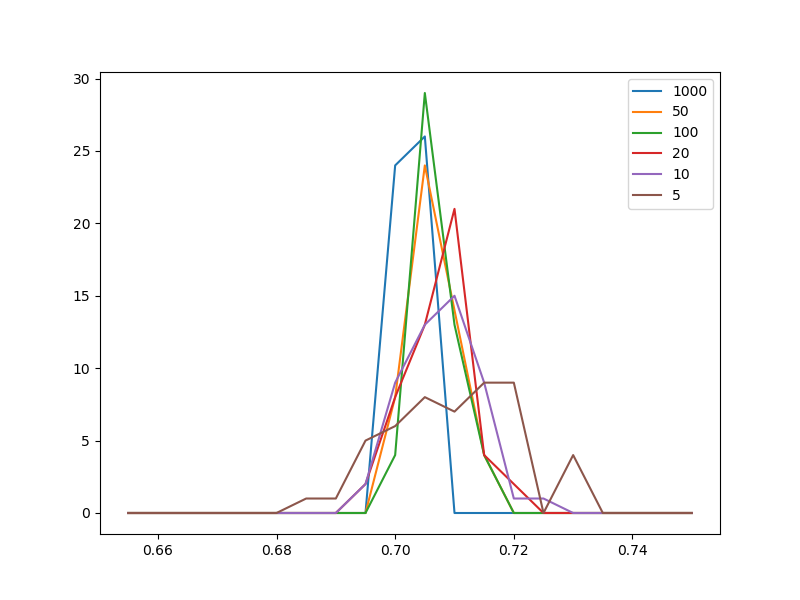

In [36]:
lgnd = list()
#print(growthrates.keys())

for initialsize in growthrates.keys():
    #print(initialsize)
    #print(growthrates[initialsize])
    h,b = np.histogram(growthrates[initialsize],range = (0.65,0.75),bins = 20)
    b = b[:-1] + np.diff(b)
    
    plt.plot(b,h)
    lgnd.append(str(initialsize))

plt.legend(lgnd)
plt.show()

<IPython.core.display.Javascript object>


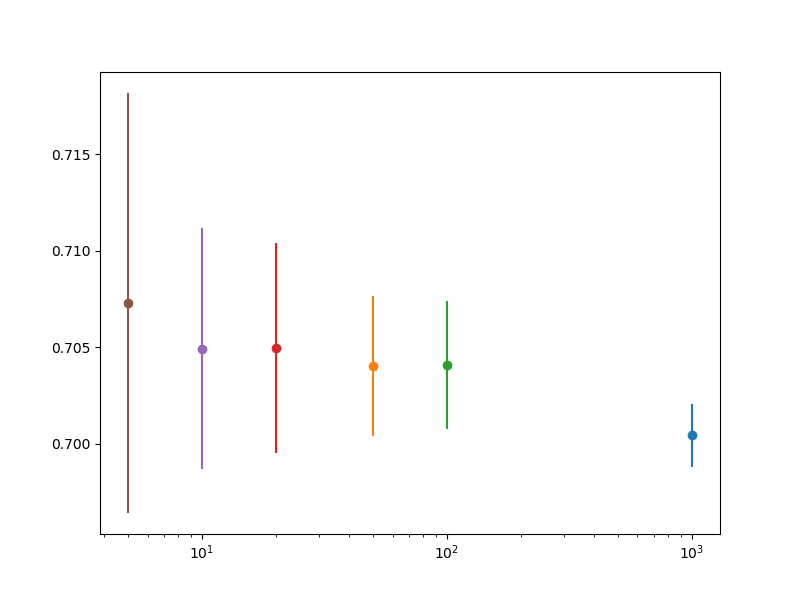

In [41]:
for initialsize in growthrates.keys():
    mean = np.mean(growthrates[initialsize])
    var  = np.var(growthrates[initialsize])
    
    plt.errorbar([initialsize],[mean],yerr = [np.sqrt(var)],marker = 'o')
plt.xscale('log')
plt.show()

In [59]:
pop = sge.Population(eigenvalues = [.9,.4],noiseamplitude = .1,beta = .25)
pop.growth(divisionevents = 1000)

<IPython.core.display.Javascript object>


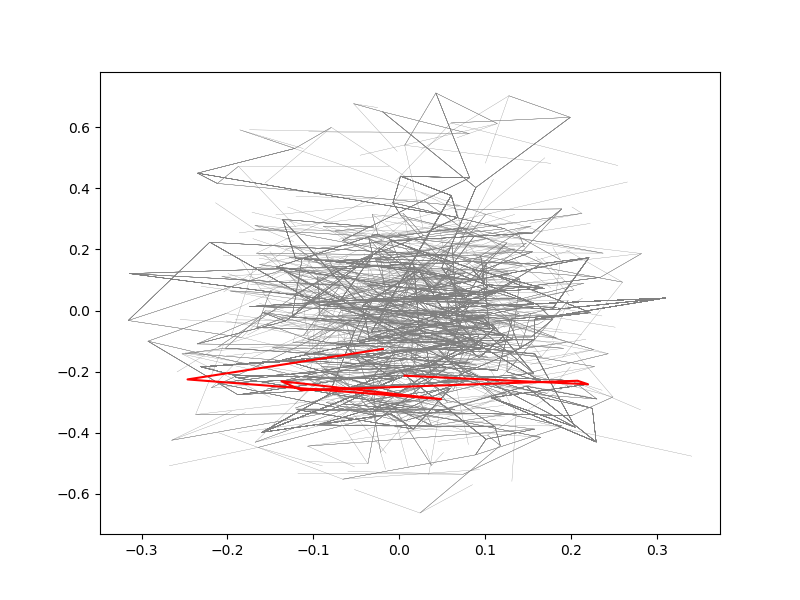

In [65]:
for idx in range(1,1000):

    ld = pop.events.LineageData(idx)
    plt.plot(ld['parentstate0'],ld['parentstate1'],c = 'gray',linewidth = .2)

ld = pop.events.LineageData(901)
plt.plot(ld['parentstate0'],ld['parentstate1'],c = 'red')
